<a href="https://colab.research.google.com/github/milydiazmarquez605-wq/Estadistica2025B/blob/main/Practica_1_U3_Mily_D%C3%ADaz_de_Le%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install alpha_vantage

In [4]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Clave de API
my_key = 'H8S4HF3I57NINC89'
# Crear objeto TimeSeries
ts = TimeSeries(key=my_key, output_format='pandas')
# Obtener datos diarios de AMZN
# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener
ticker = 'TGT' # Target Corporation Common Stock
data, meta = ts.get_daily(symbol=ticker, outputsize='full')

columnas = [ticker + '_' + i for i in ['Open', 'High', 'Low', 'Close', 'Volume']]
data.columns = columnas

# YYYY-mm-dd
inicio = '2023-07-20'
fin = '2025-11-11'
df = data[(data.index >= inicio) & (data.index <= fin)]

df

,TGT_Open,TGT_High,TGT_Low,TGT_Close,TGT_Volume
date,,,,,
2025-11-11,91.380,92.1300,90.9400,91.58,4762908.0
2025-11-10,91.815,93.4300,89.9200,90.73,6299898.0
2025-11-07,89.150,91.5800,89.1500,91.24,6524897.0
2025-11-06,91.790,92.7100,88.4800,89.15,7051541.0
2025-11-05,89.830,93.2600,89.0200,91.94,8168416.0
...,...,...,...,...,...
2023-07-26,132.760,135.5400,132.4589,134.47,5180126.0
2023-07-25,135.090,135.8300,133.3400,133.60,3849394.0
2023-07-24,134.320,135.6000,133.8300,135.41,2622554.0


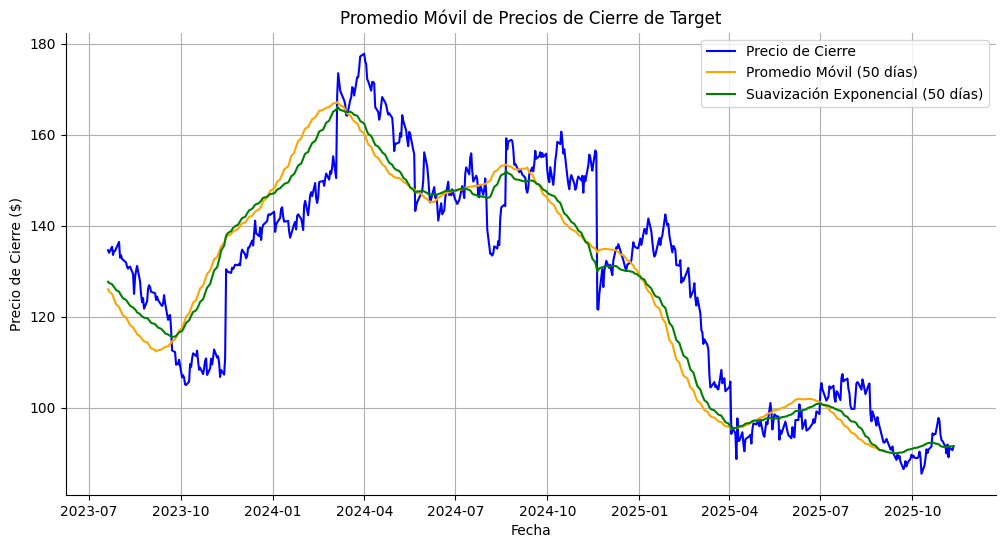

In [5]:
# Promedio Móvil Simple
ventana_sma = 50
df['SMA'] = df['TGT_Close'].rolling(window=ventana_sma).mean()

# Promedio Móvil Exponencial
ventana_ses = 50
df['SES'] = df['TGT_Close'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['TGT_Close'], label='Precio de Cierre', color='blue')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='orange')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='green')
plt.title('Promedio Móvil de Precios de Cierre de Target')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [6]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['TGT_Close'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")


Estadístico ADF: -1.8131757543351905
p-value: 0.37394019548835944
La tendencia no es estacionaria (aceptamos la hipótesis nula).


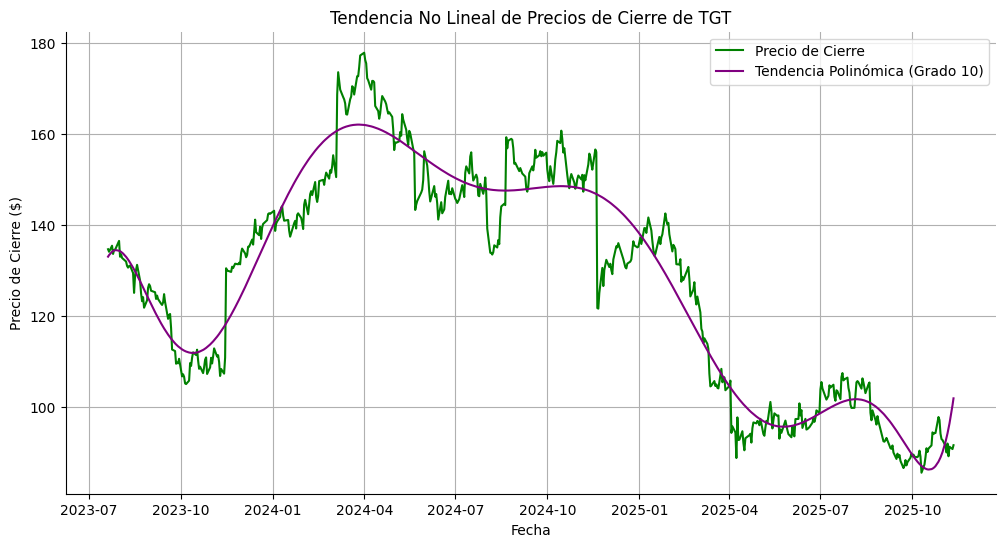

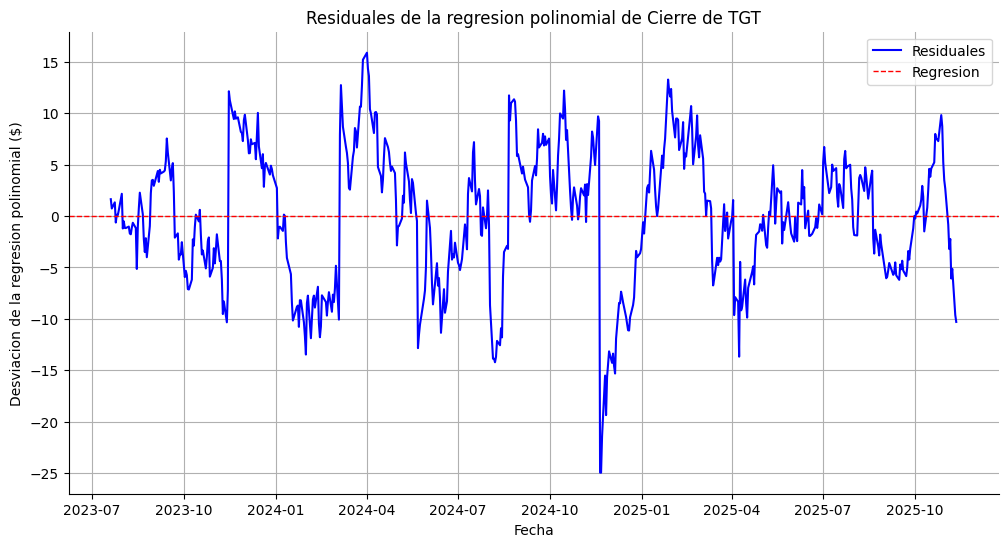

In [7]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['TGT_Close']

# Paso 3: Ajustar un modelo polinómico
grado = 10
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Precio de Cierre', # etiqueta que aparecerá en la leyenda
    color='green'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='purple')
plt.title('Tendencia No Lineal de Precios de Cierre de TGT') # Título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Precio de Cierre ($)')                            # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)




# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='blue')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de TGT')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [9]:

def Transformada_de_Fourier(serie, terminos, un_grafico, termino):
  '''La función acepta los argumentos "serie", la cual debe de ser un array
  en numpy y en pandas de la forma df["my_variable"].values. Por otra parte,
  el parámetro "terminos" es un número natural que indica la cantidad de
  términos que desarrolla la serie. Entre mayor sea el número de términos,
  la serie será más precisa, pero más difícil de interpretar.

  La función tiene como salida una lista con los componentes sinosoidales de serie.
  El último elemento de la lista, es la suma de todos los componentes'''

  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  from scipy.fftpack import fft, ifft

  # Supongamos que tienes una serie en df['AAPL_Close']
  # Reemplaza esta línea con tu DataFrame y serie específicos
  n = len(serie)

  # Calcular la transformada de Fourier
  transformada_fourier = fft(serie)

  # Obtener las frecuencias
  frecuencias = np.fft.fftfreq(n)

  # Crear un DataFrame para almacenar la frecuencia y su magnitud
  componentes = pd.DataFrame({
      'frecuencia': frecuencias,
      'magnitud': np.abs(transformada_fourier),
      'longitud_de_onda': 1 / frecuencias
  })

  # Ordenar el dataframe de mayor a menor en términos de magnitud

  componentes = componentes.sort_values(by='magnitud', ascending=False)

  # Seleccionar las frecuencias con mayor magnitud (excluyendo la frecuencia cero)
  top_frecuencias = componentes.loc[componentes['frecuencia'] > 0].nlargest(terminos, 'magnitud')
  top_frecuencias.reset_index(drop=True, inplace=True)
  print("Frecuencias principales:\n", top_frecuencias)

  # Crear el índice de tiempo para la serie
  t = np.arange(n)

  # Graficar cada componente de frecuencia junto con la serie original
  plt.figure(figsize=(12, 4))

  componente_temporal_sumado = np.zeros_like(serie)
  componentes_temporales = []

  n=0
  for i, row in top_frecuencias.iterrows():
      n+=1
      # Copiar la transformada de Fourier y mantener solo la frecuencia actual
      fourier_component = np.zeros_like(transformada_fourier)
      idx = np.where(frecuencias == row['frecuencia'])[0][0]  # índice de la frecuencia en la FFT
      fourier_component[idx] = transformada_fourier[idx]  # mantener solo la frecuencia positiva
      fourier_component[-idx] = transformada_fourier[-idx]  # mantener la frecuencia negativa correspondiente
      if n == (terminos+1):
        break

      # Reconstruir la señal en el tiempo
      componente_temporal = ifft(fourier_component).real
      componentes_temporales.append(componente_temporal)
      componente_temporal_sumado += componente_temporal
      if i == termino:
          df["seasonal_poly"] = componente_temporal

      # Graficar la componente
      plt.plot(
          componente_temporal,
          label=f'Longitud de onda {1 / row["frecuencia"]:.0f}',
          alpha=1,
          linewidth = 0.5,
          )
      plt.title('Componentes de Fourier de la Serie')
      plt.xlabel('Tiempo')
      plt.ylabel('Valor')
      plt.legend()
      plt.grid()

  componentes_temporales.append(componente_temporal_sumado)
  plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  if not un_grafico:
    plt.figure(figsize=(12, 4))
    plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  plt.plot(componente_temporal_sumado, label='Componente temporal sumada', color='red')
  plt.legend()
  plt.title('Suma de los Componentes de Fourier de la Serie')
  plt.xlabel('Tiempo')
  plt.ylabel('Valor')
  plt.grid()
  plt.show()

  return componentes_temporales

Frecuencias principales:
    frecuencia     magnitud  longitud_de_onda
0    0.010309  1396.030961         97.000000
1    0.013746  1015.593571         72.750000
2    0.008591   773.476158        116.400000
3    0.015464   702.873998         64.666667
4    0.017182   562.559333         58.200000


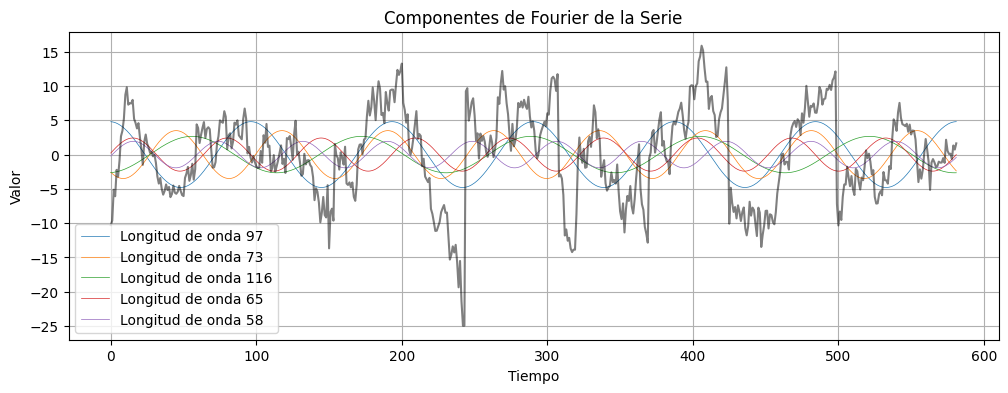

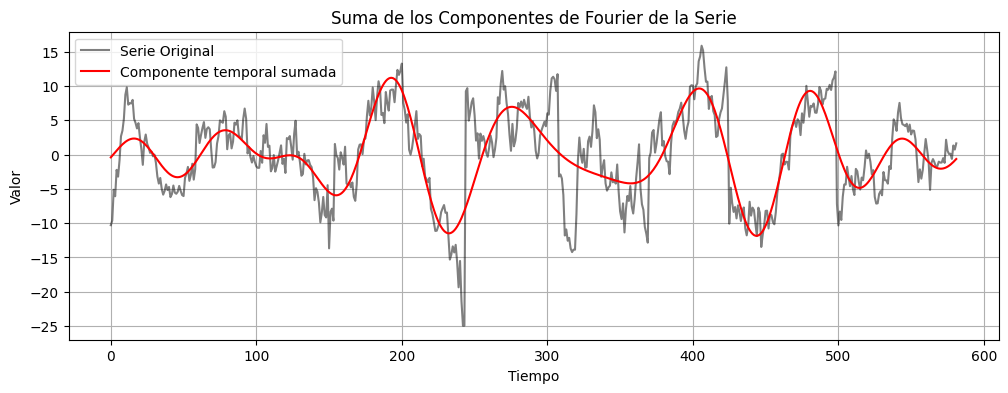

In [10]:
serie = df['Poly_Resid'].values
terminos = 5
un_grafico = False

cts = Transformada_de_Fourier(serie, terminos, un_grafico, 2)

# cts: componente temporal sumado


In [11]:
df

,TGT_Open,TGT_High,TGT_Low,TGT_Close,TGT_Volume,SMA,SES,Date,Poly_Trend,Poly_Resid,seasonal_poly
date,,,,,,,,,,,
2025-11-11,91.380,92.1300,90.9400,91.58,4762908.0,NaN,91.580000,1.762819e+09,101.875170,-10.295170,-2.636372
2025-11-10,91.815,93.4300,89.9200,90.73,6299898.0,NaN,91.546667,1.762733e+09,100.351189,-9.621189,-2.614278
2025-11-07,89.150,91.5800,89.1500,91.24,6524897.0,NaN,91.534641,1.762474e+09,96.369854,-5.129854,-2.584568
2025-11-06,91.790,92.7100,88.4800,89.15,7051541.0,NaN,91.441125,1.762387e+09,95.226780,-6.076780,-2.547329
2025-11-05,89.830,93.2600,89.0200,91.94,8168416.0,NaN,91.460689,1.762301e+09,94.169566,-2.229566,-2.502670
...,...,...,...,...,...,...,...,...,...,...,...
2023-07-26,132.760,135.5400,132.4589,134.47,5180126.0,123.9498,126.565141,1.690330e+09,134.343273,0.126727,-2.631143
2023-07-25,135.090,135.8300,133.3400,133.60,3849394.0,124.4894,126.841018,1.690243e+09,134.234538,-0.634538,-2.647643
2023-07-24,134.320,135.6000,133.8300,135.41,2622554.0,125.0544,127.177056,1.690157e+09,134.082948,1.327052,-2.656430


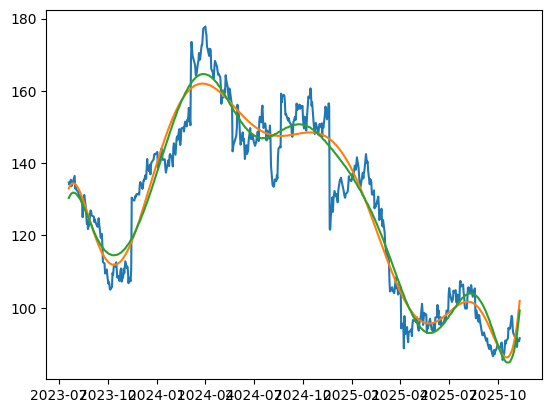

In [12]:
plt.plot(df["TGT_Close"])
plt.plot(df["Poly_Trend"])
plt.plot(df["Poly_Trend"] + df['seasonal_poly'])

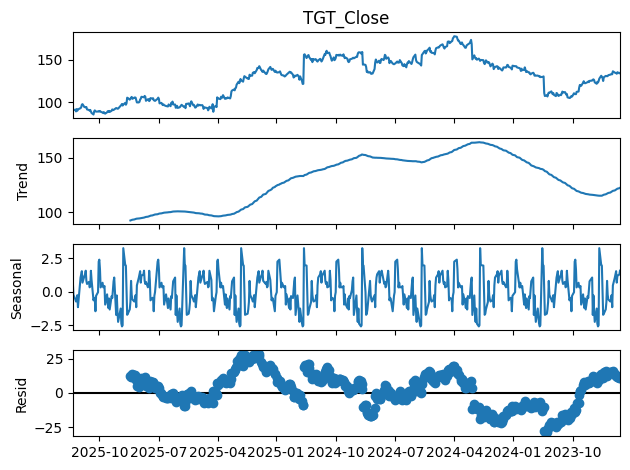

In [13]:
#Descomposición de la serie
# Descomponer la serie temporal
import statsmodels.api as sm

descomposicion = sm.tsa.seasonal_decompose(
    df['TGT_Close'],
    model='additive',
    period=63,
    extrapolate_trend=0,
    two_sided=False,
    )  # 252 días de negociación al año
fig = descomposicion.plot()
plt.show()

In [14]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(descomposicion.resid.dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")

Estadístico ADF: -2.6052878064423335
p-value: 0.09190930290398786
La tendencia no es estacionaria (aceptamos la hipótesis nula).


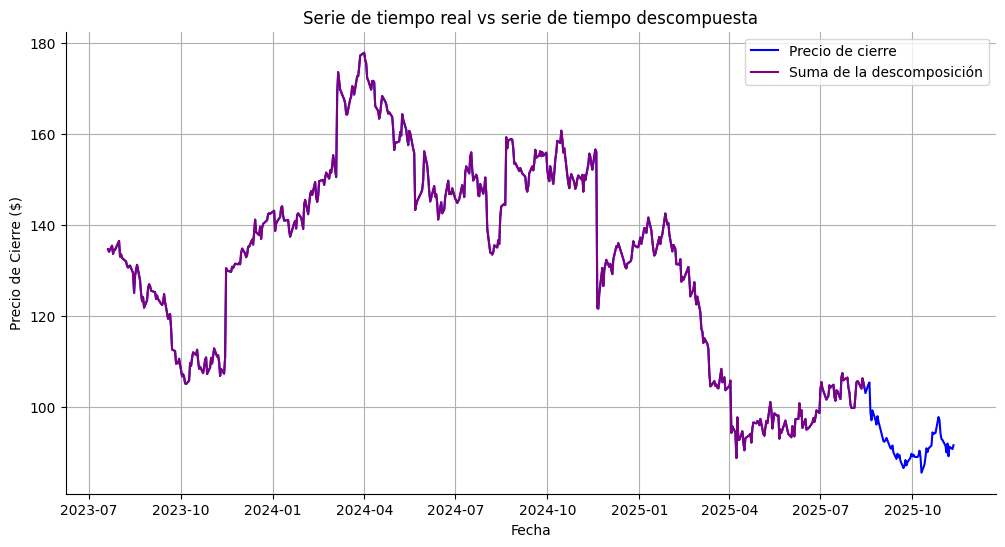

In [15]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['TGT_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal + descomposicion.resid, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

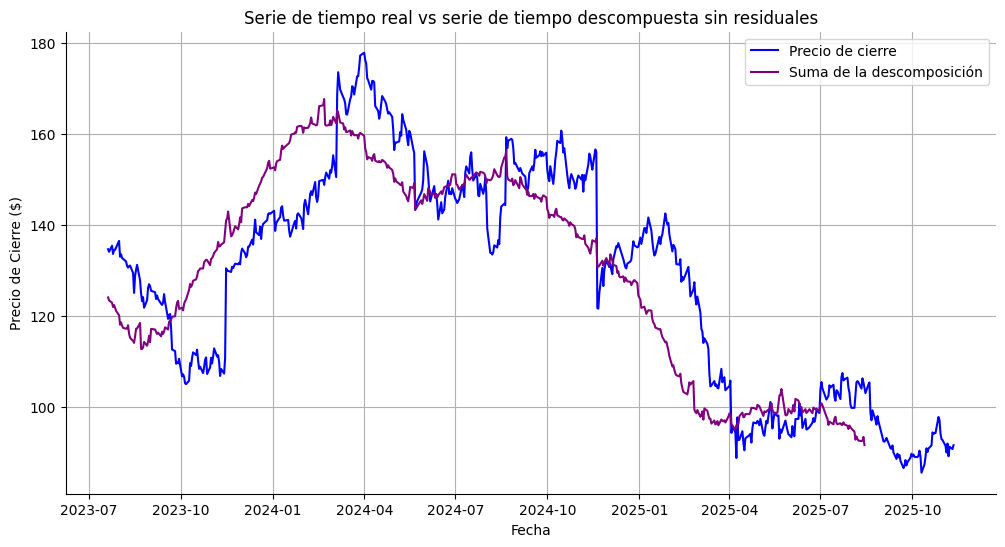

In [16]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['TGT_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

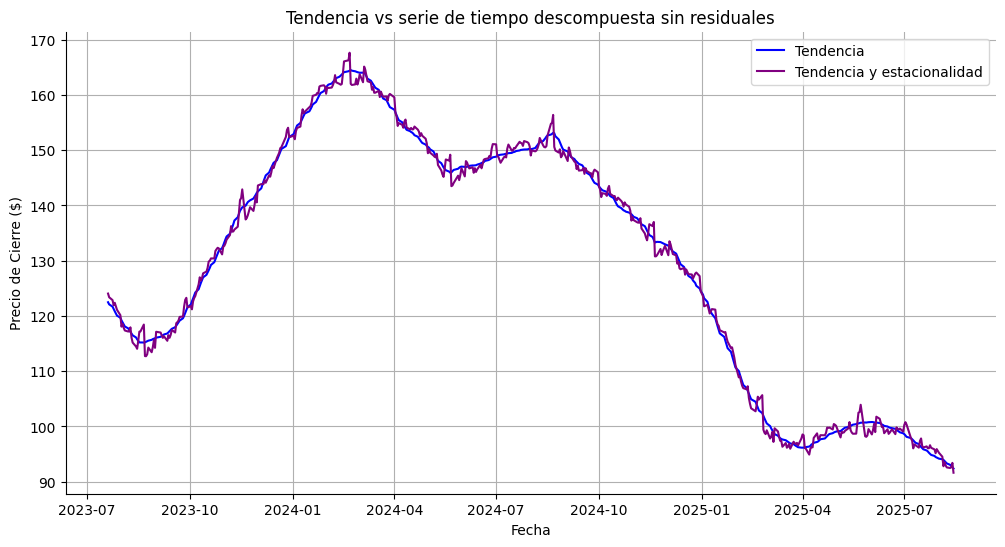

In [17]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(descomposicion.trend, label='Tendencia', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Tendencia y estacionalidad', color='purple')
plt.title('Tendencia vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [ ]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['TGT_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion.trend + descomposicion.resid, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin el componente estacional')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [18]:
#Prueba t pareada para verificar si la estacionalidad tiene un efecto significativo
from scipy.stats import ttest_rel

# Prueba t pareada para el efecto significativo de la estacionalidad

#Hipótesis nula (H₀): Ambas series son iguales.
#Hipótesis alternativa (H₁): Ambas series son diferentes


nivel_de_significancia = 0.05
tendencia = descomposicion.trend
tendencia_estacionalidad = descomposicion.seasonal + descomposicion.trend

# Eliminar valores NaN de ambas series
tendencia.dropna(inplace=True)
tendencia_estacionalidad.dropna(inplace=True)

# Realizar la prueba t pareada
t_stat, p_valor = ttest_rel(tendencia, tendencia_estacionalidad)

print("Estadístico t:", t_stat)
print("Valor p:", p_valor)
print("\n")

# Interpretación de los resultados
if p_valor < nivel_de_significancia:
    print("El valor p es menor que 0.05, por lo tanto, rechazamos la hipótesis nula.")
    print("Conclusión: La estacionalidad tiene un efecto significativo en la serie de tiempo.")
else:
    print("El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.")


Estadístico t: -0.19366311232432531
Valor p: 0.8465154471981746


El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.
Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.


In [19]:
from scipy.stats import wilcoxon

# Prueba Wilcoxon pareada para el efecto significativo de la estacionalidad

#Hipótesis nula (H₀): Ambas series son iguales.
#Hipótesis alternativa (H₁): Ambas series son diferentes

tendencia = descomposicion.trend
tendencia_estacionalidad = descomposicion.seasonal + descomposicion.trend

# Eliminar valores NaN de ambas series
tendencia.dropna(inplace=True)
tendencia_estacionalidad.dropna(inplace=True)

# Realizar la prueba de Wilcoxon
w_stat, p_valor = wilcoxon(tendencia, tendencia_estacionalidad)

print("Estadístico de Wilcoxon:", w_stat)
print("Valor p:", p_valor)
print("\n")

# Interpretación de los resultados
if p_valor < 0.05:
    print("El valor p es menor que 0.05, por lo tanto, rechazamos la hipótesis nula.")
    print("Conclusión: La estacionalidad tiene un efecto significativo en la serie de tiempo.")
else:
    print("El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.")


Estadístico de Wilcoxon: 67671.0
Valor p: 0.9862681087736073


El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.
Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.


In [20]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox

# Realizar la prueba de Ljung-Box
# Especifica los rezagos que deseas probar
lags = [21, 42, 63, 84, 126, 252]  # Puedes ajustar estos valores según tus necesidades
# [un mes, dos meses, tres meses, cuatro meses, seis meses, un año]

ljung_box_test = acorr_ljungbox(df['TGT_Close'], lags=lags, return_df=True)

print(ljung_box_test)

# Interpretación de los resultados
for lag, p_valor in zip(ljung_box_test.index, ljung_box_test['lb_pvalue']):
    print("\n")
    if p_valor < 0.05:
        print(f"Para el rezago {lag}, el valor p es {p_valor:.4f}, que es menor que 0.05.")
        print("Conclusión: Rechazamos la hipótesis nula. Hay autocorrelación significativa en este rezago.")
    else:
        print(f"Para el rezago {lag}, el valor p es {p_valor:.4f}, que es mayor o igual que 0.05.")
        print("Conclusión: No podemos rechazar la hipótesis nula. No hay autocorrelación significativa en este rezago.")


          lb_stat  lb_pvalue
21   10588.929912        0.0
42   17867.009524        0.0
63   22471.287142        0.0
84   25575.007441        0.0
126  27900.196360        0.0
252  35076.725060        0.0


Para el rezago 21, el valor p es 0.0000, que es menor que 0.05.
Conclusión: Rechazamos la hipótesis nula. Hay autocorrelación significativa en este rezago.


Para el rezago 42, el valor p es 0.0000, que es menor que 0.05.
Conclusión: Rechazamos la hipótesis nula. Hay autocorrelación significativa en este rezago.


Para el rezago 63, el valor p es 0.0000, que es menor que 0.05.
Conclusión: Rechazamos la hipótesis nula. Hay autocorrelación significativa en este rezago.


Para el rezago 84, el valor p es 0.0000, que es menor que 0.05.
Conclusión: Rechazamos la hipótesis nula. Hay autocorrelación significativa en este rezago.


Para el rezago 126, el valor p es 0.0000, que es menor que 0.05.
Conclusión: Rechazamos la hipótesis nula. Hay autocorrelación significativa en este rezago.


Para

In [21]:
# Este data frame son del siguiente año a df. Esto con el propósito de testear prophet
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df2 = yf.download(
    tickers='TGT',            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2018-01-01',        # Fecha de inicio
    end='2018-12-30',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df2 = df2.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df2.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df2.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df2['Date'] = pd.to_datetime(df2['Date'])

df2['Date'] = df2['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df2.set_index('Date', inplace=True)


df2

[*********************100%***********************]  1 of 1 completed


,TGT_Open,TGT_High,TGT_Low,TGT_Close,TGT_Adj Close,TGT_Volume
Date,,,,,,
2018-01-02,65.949997,68.129997,65.949997,67.629997,54.108757,8509000
2018-01-03,68.629997,68.839996,67.099998,67.169998,53.740730,6057500
2018-01-04,67.230003,67.820000,65.059998,65.849998,52.684639,7124500
2018-01-05,66.379997,66.739998,65.949997,66.550003,53.244694,5549700
2018-01-08,67.199997,68.320000,66.250000,67.180000,53.748737,8337200
...,...,...,...,...,...,...
2018-12-21,61.770000,63.509998,60.810001,61.130001,50.541939,8825100
2018-12-24,60.709999,62.709999,60.150002,61.549999,50.889202,3623400
2018-12-26,62.400002,65.230003,61.990002,65.110001,53.832577,6157300


In [22]:
!pip install prophet

In [24]:
df2=df.copy()

**Conclusiones Generales**

El estudio de la serie de tiempo del precio de cierre de las acciones de Target Corporation permitió analizar su comportamiento desde diferentes enfoques estadísticos. En primer lugar, la gráfica del precio y los promedios móviles evidenció una tendencia no lineal y fluctuante, típica de los mercados financieros. Esta observación fue confirmada mediante la prueba Dickey–Fuller aumentada, donde el p-value resultó mayor a 0.05, lo que indica que la serie no es estacionaria y que su comportamiento depende del tiempo.
Posteriormente, al ajustar una regresión polinomial de grado 10 se logró capturar visualmente la tendencia general del precio. Sin embargo, al revisar los residuales y someterlos nuevamente a la prueba ADF, se observó que la estacionariedad no se alcanzó completamente, lo que sugiere que la volatilidad y las fluctuaciones propias del mercado no pueden ser explicadas únicamente por un modelo polinómico.
La descomposición de la serie apoyó esta conclusión, mostrando que la estacionalidad identificada es débil. Tanto la prueba t pareada como la prueba de Wilcoxon arrojaron valores p elevados, confirmando que la estacionalidad no tiene un efecto estadísticamente significativo en el comportamiento del precio. Esto implica que, si bien existen variaciones periódicas, estas no son lo suficientemente fuertes como para influir en la tendencia general.
Finalmente, la prueba de Ljung-Box reveló autocorrelación significativa en múltiples rezagos, lo que demuestra que los valores pasados influyen directamente en los futuros. Esta dependencia temporal es un rasgo característico de las series financieras y una razón más por la cual la estacionariedad no se logra con modelos simples.
En síntesis, el análisis permite concluir que la serie del precio de TGT es no estacionaria, altamente autocorrelacionada y con estacionalidad débil. Aunque el modelo polinomial ayuda a visualizar la tendencia, no es suficiente para estabilizar la serie ni para capturar completamente su estructura. Por lo tanto, para un pronóstico más preciso sería necesario emplear modelos especializados para datos financieros, como ARIMA, modelos con diferenciación o enfoques híbridos que consideren tanto la tendencia como la dependencia temporal.